<a href="https://colab.research.google.com/github/arishp/veltech_genai/blob/main/stable_diffusion_dreambooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!git clone https://github.com/huggingface/diffusers

In [ ]:
!pip install ./diffusers

In [ ]:
!pip install -r diffusers/examples/dreambooth/requirements.txt

In [ ]:
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu121

In [ ]:
!pip install bitsandbytes

In [8]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [9]:
MODEL_NAME="CompVis/stable-diffusion-v1-4"

In [14]:
INSTANCE_DIR="/content/paarisathyanesan"
!mkdir $INSTANCE_DIR

# upload image files

In [15]:
OUTPUT_DIR="/content/output_model"
!mkdir $OUTPUT_DIR

In [16]:
CLASS_DIR="/content/class_images"
!mkdir $CLASS_DIR

In [18]:
!accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of paarisathyanesan kid" \
  --class_prompt="a photo of kid" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing \
  --use_8bit_adam \
  --enable_xformers_memory_efficient_attention \
  --set_grads_to_none \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=200 \
  --max_train_steps=800

2024-04-28 16:12:34.044580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 16:12:34.044640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 16:12:34.046041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-28 16:12:35.884298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/28/2024 16:12:37 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type

In [ ]:
!zip -r /content/output_model.zip /content/output_model

In [42]:
import gc
gc.collect()

0

In [46]:
import torch
torch.cuda.empty_cache()

In [ ]:
!pip install diffusers --upgrade

In [1]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

unet = UNet2DConditionModel.from_pretrained("/content/output_model/unet")

# if you have trained with `--args.train_text_encoder` make sure to also load the text encoder
text_encoder = CLIPTextModel.from_pretrained("/content/output_model/text_encoder")

pipeline = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", unet=unet, text_encoder=text_encoder, dtype=torch.float16,
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [4]:
neg_prompt = "bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet"
image = pipeline("photorealistic image of paarisathyanesan kid in superman costume",
                 num_inference_steps=60,
                 guidance_scale=7.5,
                 negative_prompt=neg_prompt).images[0]
image.save("paari-1.png")

  0%|          | 0/60 [00:00<?, ?it/s]

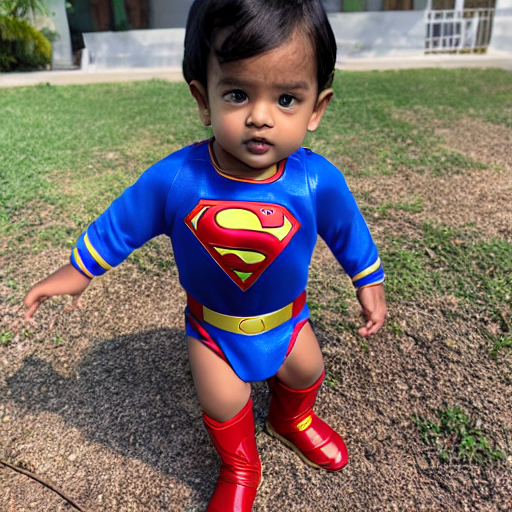

In [5]:
from IPython.display import Image
Image('paari-1.png')